<a href="https://colab.research.google.com/github/sieuthanthu002/bt-AI-2/blob/main/5_kinds_of_flowers_(rose%2C_lotus%2C_water_lily%2C_apricot%2C_daisy%2C_pink).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img,img_to_array

folder = '/content/drive/MyDrive/flower/'
photos,labels = list(),list()
for file in listdir(folder):
  if file.startswith('hoa_hong'):
    output = 0
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('huong_duong'):
    output = 1
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoa_mai'):
    output = 2
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoa_sen'):
    output = 3
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('violet'):
    output = 4
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('food.npy',photos)
save('food.npy',labels)

(460, 40, 30, 3) (460,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(40,30,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
15/15 [==============================] - 15s 35ms/step - loss: 9.3130 - accuracy: 0.5152
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4987 - accuracy: 0.8587
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0782 - accuracy: 0.9696
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 10ms/step - loss: 9.7766e-04 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 8.4491e-04 - accuracy: 1.0000
Epoch 11

In [5]:
model.evaluate(photos,labels)
model.save('Nhandangkhuonmat.h5')
classes = ["Hoa_hồng","Hướng_dương","Hoa_mai","_Hoa_sen","Hoa_Violer"]

15/15 [==============================] - 0s 3ms/step - loss: 3.3211e-05 - accuracy: 1.0000


1/1 [==============================] - 0s 191ms/step
[[0.10432654 0.10441007 0.10230567 0.11061127 0.10132784 0.08604959
  0.09750409 0.09837414 0.09672387 0.09836686]]


'_Hoa_sen'

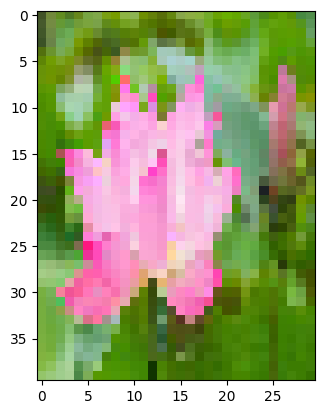

In [6]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/test folder/tải xuống.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 22ms/step
[[0.10446092 0.1133128  0.11375852 0.10410832 0.09873795 0.0780692
  0.10036211 0.09855667 0.09042414 0.09820937]]


'Hoa_mai'

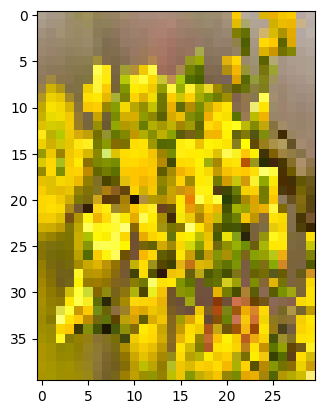

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/test folder/y-nghia-hoa-mai-trong-ngay-tet-3.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]